# Optimization Study: Pre-Processing

In [3]:
%matplotlib inline
import os 
import numpy as np
import glob
import matplotlib.pyplot as plt
from IPython.display import Image, display

from pymooCFD.setupOpt import dataDir, mapDir, plotDir, var_labels, obj_labels, studyDir
from pymooCFD.util.handleData import loadCP



Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False



## Mesh Sensitivity Study

Run mesh study
```python
from pymooCFD.preProcOpt import meshStudy
meshStudy()
```

In [21]:
coor_1 = np.loadtxt(os.path.join(studyDir, 'meshSF-1', 'interp_drop_coor.txt'))
coor_15 = np.loadtxt(os.path.join(studyDir, 'meshSF-1.5', 'interp_drop_coor.txt'))

In [4]:
print(coor_sf_1)
print(len(coor_sf_1))

[[-0.0069098   0.019873  ]
 [-0.00689599  0.019596  ]
 [-0.00688217  0.019509  ]
 ...
 [ 0.00686367  0.019524  ]
 [ 0.00687749  0.020036  ]
 [ 0.0068913   0.019873  ]]
1000


In [10]:
x_coor_1 = coor_1[:,0]
y_coor_1 = coor_1[:,1]
x_coor_15 = coor_15[:,0]
y_coor_15 = coor_15[:,1]

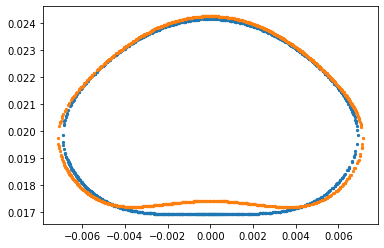

In [12]:
size = 5
plt.scatter(x_coor_1, y_coor_1, s=size)
plt.scatter(x_coor_15, y_coor_15, s=size)

#### Using Traveling Salesman Problem Aproach to sort points

### STP does not work on this many points 

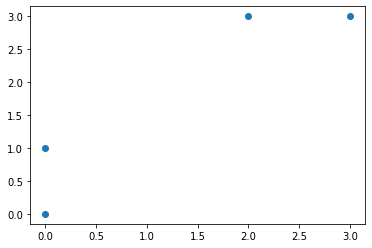

TypeError: solve_tsp_dynamic_programming() got an unexpected keyword argument 'x0'

In [31]:
# test lib
import numpy as np
from python_tsp.exact import solve_tsp_dynamic_programming
from python_tsp.distances import great_circle_distance_matrix

sources = np.array([
    [0, 1],
    [3, 3],
    [2, 3],
    [0, 0]
])
plt.scatter(sources[:,0], sources[:,1])
plt.show()
distance_matrix = great_circle_distance_matrix(sources)
permutation, distance = solve_tsp_dynamic_programming(distance_matrix)
print(permutation, distance)
print(sources[permutation])
plt.plot(sources[permutation][:,0], sources[permutation][:,1])

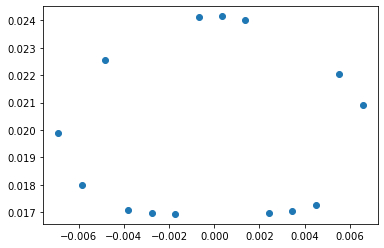

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [32]:
%%time
# test lib
import numpy as np
# from python_tsp.exact import solve_tsp_dynamic_programming
from python_tsp.heuristics import solve_tsp_local_search
from python_tsp.distances import great_circle_distance_matrix

sources = coor_1[::75]
plt.scatter(sources[:,0], sources[:,1])
plt.show()
distance_matrix = great_circle_distance_matrix(sources)
permutation, distance = solve_tsp_local_search(distance_matrix)
print(permutation, distance)
print(sources[permutation])
# plt.plot(sources[permutation][:,0], sources[permutation][:,1])
plt.plot(sources[permutation])

In [26]:
def distance(P1, P2):
    """
    This function computes the distance between 2 points defined by
     P1 = (x1,y1) and P2 = (x2,y2) 
    """
    return ((P1[0] - P2[0])**2 + (P1[1] - P2[1])**2) ** 0.5


def optimized_path(coords, start=None):
    """
    This function finds the nearest point to a point
    coords should be a list in this format coords = [ [x1, y1], [x2, y2] , ...] 
    """
    if start is None:
        start = coords[0]
    pass_by = coords
    path = [start]
    pass_by.remove(start)
    while pass_by:
        nearest = min(pass_by, key=lambda x: distance(path[-1], x))
        path.append(nearest)
        pass_by.remove(nearest)
    return path

print(x_coor_1[0])
# define a start point
start = [x_coor_1[0], y_coor_1[0]]
print(start)
print([list(row) for row in coor_1])
print(coor_1.dtype)
path = optimized_path(coor_1,start)


-0.0069098
[-0.0069098, 0.019873]
[[-0.004542, 0.017261], [-0.0045274, 0.017258], [-0.0045729, 0.017275], [-0.0044659, 0.017237], [-0.0044279, 0.017228], [-0.0043855, 0.017218], [-0.0043284, 0.017201], [-0.0043064, 0.017197], [-0.0048322, 0.017369], [-0.0048259, 0.017367], [-0.0048421, 0.017375], [-0.004762, 0.017339], [-0.0047264, 0.017329], [-0.0046847, 0.017317], [-0.0046269, 0.017296], [-0.0046098, 0.017292], [-0.0050428, 0.017457], [-0.0050249, 0.017452], [-0.0050693, 0.017475], [-0.0049714, 0.017429], [-0.0049254, 0.017411], [-0.0048971, 0.017404], [-0.0052431, 0.017556], [-0.0052239, 0.01755], [-0.0052676, 0.017575], [-0.0051735, 0.017526], [-0.0051244, 0.017503], [-0.0051027, 0.017497], [-0.0054334, 0.017664], [-0.0054229, 0.017661], [-0.005444, 0.017675], [-0.0053689, 0.017629], [-0.0053234, 0.017607], [-0.0052997, 0.017599], [-0.0055571, 0.01774], [-0.0055224, 0.017724], [-0.0056001, 0.017775], [-0.0054888, 0.017709], [-0.0056724, 0.017824], [-0.0056219, 0.01779], [-0.0057214

AttributeError: 'numpy.ndarray' object has no attribute 'remove'

In [28]:
s = 1
e = 20
plt.scatter(x_coor_1[s:e], y_coor_1[s:e])
plt.plot(x_coor_1[s:e], y_coor_1[s:e])

NameError: name 'x_coor_1' is not defined

In [8]:
from python_tsp.distances import great_circle_distance_matrix
dist_mat = great_circle_distance_matrix(coor_1)

In [ ]:
%%time
# sort using traveling salesmen problem approach
from python_tsp.exact import solve_tsp_dynamic_programming
permutation, distance = solve_tsp_dynamic_programming(dist_mat)

In [ ]:
plt.scatter(x_coor[s:e], y_coor[s:e])
plt.plot(x_coor[s:e], y_coor[s:e])

#### Use Shapely

732
1128


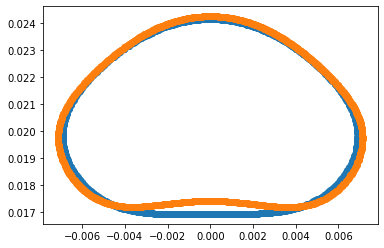

In [6]:
# load raw paraview points 
raw_coor_1 = np.loadtxt('preProcOpt/meshStudy/meshSF-1/ls_phi-0.5.txt', delimiter=',', skiprows=1, usecols=(1,2))
raw_coor_15 = np.loadtxt('preProcOpt/meshStudy/meshSF-1.5/ls_phi-0.5.txt', delimiter=',', skiprows=1, usecols=(1,2))
print(len(raw_coor_1))
print(len(raw_coor_15))
plt.scatter(raw_coor_1[:,0], raw_coor_1[:,1])
plt.scatter(raw_coor_15[:,0], raw_coor_15[:,1])

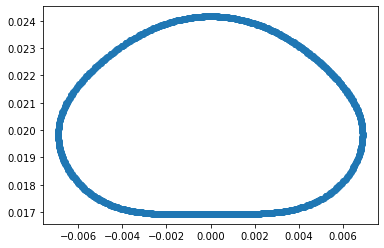

In [7]:
from shapely.geometry.polygon import LinearRing

ring_1 = LinearRing(raw_coor_1)
coor_1 = np.array(list(ring_1.coords))
# plt.plot(list(ring_1.coords[:][0]), list(ring_1.coords[:][1]))
x_coor = coor_1[:,0]
y_coor = coor_1[:,1]
plt.scatter(np.array(ring_1.coords)[:,0], np.array(ring_1.coords)[:,1])

In [28]:
# print(list(ring_1.coords))

In [40]:
print(np.array(ring_1.coords))
print(np.array(ring_1.coords)[:,0])

[[-0.004542   0.017261 ]
 [-0.0045274  0.017258 ]
 [-0.0045729  0.017275 ]
 ...
 [-0.0012438  0.016937 ]
 [-0.0011817  0.016938 ]
 [-0.004542   0.017261 ]]
[-4.5420e-03 -4.5274e-03 -4.5729e-03 -4.4659e-03 -4.4279e-03 -4.3855e-03
 -4.3284e-03 -4.3064e-03 -4.8322e-03 -4.8259e-03 -4.8421e-03 -4.7620e-03
 -4.7264e-03 -4.6847e-03 -4.6269e-03 -4.6098e-03 -5.0428e-03 -5.0249e-03
 -5.0693e-03 -4.9714e-03 -4.9254e-03 -4.8971e-03 -5.2431e-03 -5.2239e-03
 -5.2676e-03 -5.1735e-03 -5.1244e-03 -5.1027e-03 -5.4334e-03 -5.4229e-03
 -5.4440e-03 -5.3689e-03 -5.3234e-03 -5.2997e-03 -5.5571e-03 -5.5224e-03
 -5.6001e-03 -5.4888e-03 -5.6724e-03 -5.6219e-03 -5.7214e-03 -5.6106e-03
 -5.7341e-03 -5.7444e-03 -5.8486e-03 -5.8209e-03 -5.8731e-03 -5.7845e-03
 -5.9571e-03 -5.9204e-03 -5.9911e-03 -5.8949e-03 -6.0616e-03 -6.0199e-03
 -6.1000e-03 -6.0030e-03 -6.1627e-03 -6.1194e-03 -6.2001e-03 -6.1074e-03
 -6.2605e-03 -6.2189e-03 -6.2920e-03 -6.2068e-03 -6.3546e-03 -6.3184e-03
 -6.3772e-03 -6.3012e-03 -6.4439e-03 -6.4

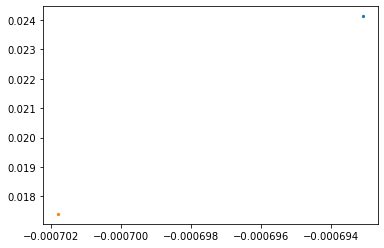

In [75]:
start = 450
pts = 451
plt.scatter(coor_sf_1[start:pts,0], coor_sf_1[start:pts,1], s=5)
plt.scatter(coor_sf_15[start:pts,0], coor_sf_15[start:pts,1], s=5)

In [52]:
np.mean(abs(coor_sf_1-coor_sf_15))

0.0015147994904904903

Use data from generation 1's population to make critial decisions on the optimization study's set up.

In [2]:
genDir = os.path.join(dataDir, 'gen1')

## Run Generation 1
UNABLE TO RUN FROM JUPYTER NOTEBOOK

If generation 1 has not been run yet do so now. In most cases it is better practice to run generation 1 outside of Jupyter notebook. To do so copy the following command into you execPymoo.py file. 

In [3]:
# !conda activate pymoo-CFD && yalesmodules && python execGen1.py

In [4]:
# from pymooCFD.runGen1 import runGen1

In [5]:
# # safe run: only if generation directory does not exist and still tries to load checkpoint-gen1
# if not os.path.isdir(genDir):
#     runGen1(restart=True)

In [6]:
# runGen1(restart=False)

## Load Generation 1 Checkpoint
Load algorithm object stored in numpy checkpoint file then extract parameter and objectives from the latest generation's population. 

In [7]:
checkpointFile = os.path.join(dataDir, 'checkpoint-gen1.npy')
algorithm = loadCP(checkpointFile = checkpointFile)
if algorithm.n_gen == 1:
    print('Looking good')
else:
    print('You sure about this?')

Looking good


In [8]:
X = algorithm.pop.get('X')
F = algorithm.pop.get('F')
n_var = len(X.transpose())
n_obj = len(F.transpose())

## Parameter and Objective Space

In [9]:
from pymoo.visualization.scatter import Scatter
# https://pymoo.org/visualization/scatter.html

### Parameter Space

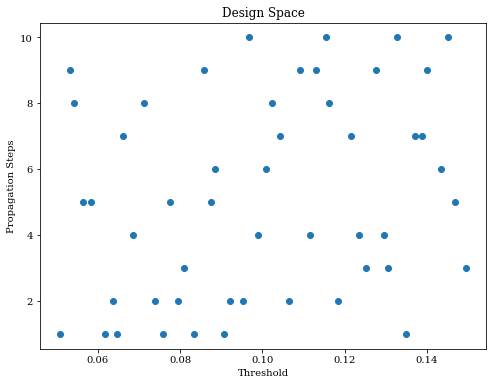

In [10]:
##### Variable Space ######
def plotX(leg=False):
    if n_var > 3:
        x_space = Scatter(title = 'Design Space')
    else:
        x_space = Scatter(title = 'Design Space',
                        labels = var_labels, legend=leg)
    x_space.add(X)
    return x_space
x_space = plotX()
x_space.save(f'{plotDir}/var-space.png')
x_space.show()

### Objective Space

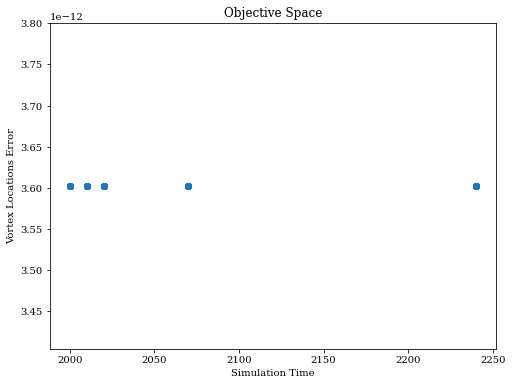

In [11]:
##### Function Space ######
def plotF(leg=False):
    if n_obj > 3:
        f_space = Scatter(title = 'Objective Space')
    else:
        f_space = Scatter(title = 'Objective Space',
                        labels = obj_labels, legend=leg)
    f_space.add(F)
    return f_space
f_space = plotF()
f_space.save(f'{plotDir}/obj-space.png')
f_space.show()

## Map Generation 1 
Plot parameters vs. objective one at a time providing a set of 2D plots that can help to better understand the relationship between parameters and objectives. 

In [12]:
# from pymooCFD.util.mapGen1 import mapGen1
# mapGen1()

In [13]:
from pymooCFD.util.sysTools import emptyDir
emptyDir(mapDir)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


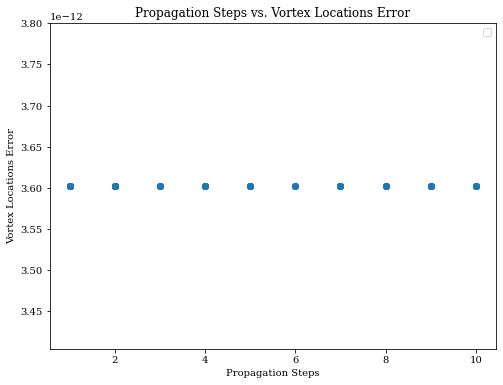

In [14]:
from numpy.polynomial import Polynomial
##### Variable vs. Objective Plots ######
# extract objectives and variables columns and plot them against each other
for x_i, x in enumerate(X.transpose()):
    for f_i, f in enumerate(F.transpose()):
        plot = Scatter(title=f'{var_labels[x_i]} vs. {obj_labels[f_i]}',
                        labels=[var_labels[x_i], obj_labels[f_i]],
                        legend=True
                        )
        xy = np.column_stack((x,f))
        plot.add(xy)
        
#         # Power Series: best fit line
#         x_poly = np.array(x, dtype=float)
#         y_poly = np.array(f, dtype=float)
#         # first degree power series
#         p_fitted = Polynomial.fit(x_poly, y_poly, 1, full=True)
#         poly_obj, lstsq = p_fitted
#         coef = poly_obj.coef
#         resid = lstsq[0][0]
#         if resid > 0.5:
#             xy = np.column_stack((x, coef[1]*x+coef[0]))
#             plot.add(xy, marker='s', label=f'deg=1, $r^2$={resid}')
            
        # second degree power series
#         p_fitted = Polynomial.fit(x_poly, y_poly, 2)
#         p_fitted.convert()
# #         print(p_fitted)
#         b, x1, x2 = p_fitted
#         xy = np.column_stack((x, x1*x+x2*x**2+b))
#         plot.add(xy, label='deg=2')

        # third degree power series
#         p_fitted = Polynomial.fit(x_poly, y_poly, 3)
#         p_fitted.convert()
# #         print(p_fitted)
#         b, x1, x2, x3 = p_fitted
#         xy = np.column_stack((x, x1*x+x2*x**2+x3*x**3+b))
#         plot.add(xy, label='deg=3')

        plot.save(os.path.join(mapDir, f'{var_labels[x_i].replace(" ", "_")}-vs-{obj_labels[f_i].replace(" ", "_")}.png'))
#         plot.show()

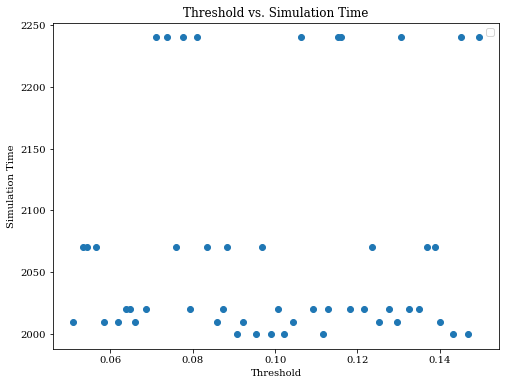

preProcOpt/plots/mapGen/Threshold-vs-Simulation_Time.png


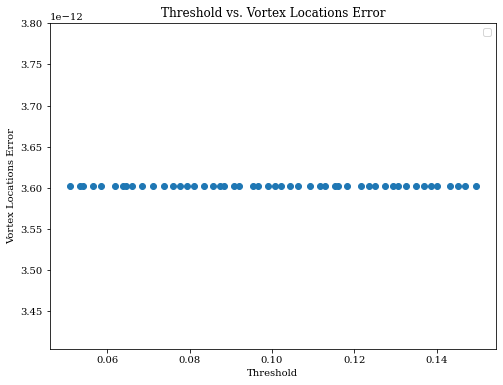

preProcOpt/plots/mapGen/Threshold-vs-Vortex_Locations_Error.png


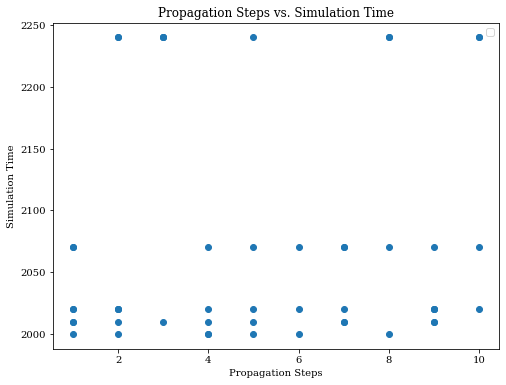

preProcOpt/plots/mapGen/Propagation_Steps-vs-Simulation_Time.png


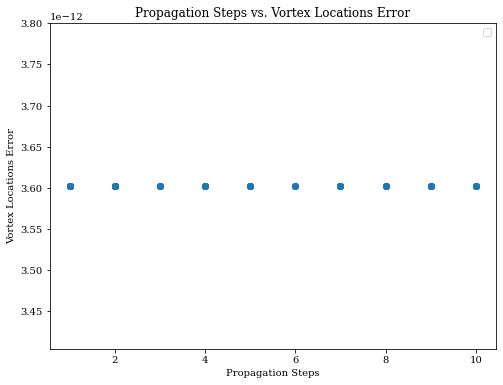

preProcOpt/plots/mapGen/Propagation_Steps-vs-Vortex_Locations_Error.png


In [15]:
for imageName in glob.glob(f'{mapDir}/*.png'): #assuming PNG
    display(Image(filename=imageName))
    print(imageName)

## Examine Extremes of Parameter Space

In [16]:
for var in range(n_var):
    print(var_labels[var])
    print(f'     lower limit - {algorithm.problem.xl[var]}')
    print(f'     upper limit - {algorithm.problem.xu[var]}')

Threshold
     lower limit - 0.05
     upper limit - 0.15
Propagation Steps
     lower limit - 1
     upper limit - 10


#### Test Corners of Parameter Space

In [17]:
xl =         [0.05, 1]  # , 0.10]  # lower limits of parameters/variables
xu =         [0.15, 10]

In [18]:
# from itertools import product

# xl = algorithm.problem.xl
# xu = algorithm.problem.xu
# n_var = len(algorithm.pop.get('X'))
# n_perm = 2**n_var
# # find every binary permutations of length n_var
# bin_perms = [list(i) for i in product([0, 1], repeat=n_var)]
# lims = np.column_stack((xl, xu))
# # limit permutations
# lim_perms = np.zeros((n_perm, n_var))
# for perm_i, bin_perm in enumerate(bin_perms):
#     for var, lim_i in enumerate(bin_perm):
#         lim_perms[perm_i, var] = lims[var][lim_i]
# print(lim_perms)

In [19]:
lim_perms = [[ 0.05,  1.  ], [ 0.05, 10.  ], [ 0.15,  1.  ]
 , [ 0.15, 10.  ]]

#### Run Parameter Space Corner Cases 

``` python
## Serial run of corner cases
from pymooCFD.setupCFD import runCase
extCaseDir = os.path.join('preProcOpt', 'lim_perm_sim')
for perm_i, lim_perm in enumerate(lim_perms):
    runCase(f'{extCaseDir}-{perm_i}', lim_perm)
```

#### Post-Process Corner Cases

In [20]:
extCaseDir = os.path.join('preProcOpt', 'lim_perm_sim')

In [21]:
extObj = []
for perm_i, lim_perm in enumerate(lim_perms):
    cwd = f'{extCaseDir}-{perm_i}'
    
    from pymooCFD.util.handleData import printArray
    printArray(lim_perm, var_labels, 'Limit Permutation')
    obj_ind = np.loadtxt(os.path.join(cwd, 'obj.txt'))
    printArray(obj_ind, obj_labels, 'Objectives')
    extObj.append(obj_ind)

    # print entities in case folder
#     ents = os.listdir(cwd)
#     for ent in ents:
#         print(f'     {ent}')
        
    print()
# extObj = np.column_stack(extObj)
extObj = np.array(extObj)

Limit Permutation  - Threshold: 0.05 / Propagation Steps: 1.0 / 
Objectives  - Simulation Time: 2220.0 / Vortex Locations Error: 3.602576326924017e-12 / 

Limit Permutation  - Threshold: 0.05 / Propagation Steps: 10.0 / 
Objectives  - Simulation Time: 769.0 / Vortex Locations Error: 3.602576326924017e-12 / 

Limit Permutation  - Threshold: 0.15 / Propagation Steps: 1.0 / 
Objectives  - Simulation Time: 309.0 / Vortex Locations Error: 3.602576326924017e-12 / 

Limit Permutation  - Threshold: 0.15 / Propagation Steps: 10.0 / 
Objectives  - Simulation Time: 315.0 / Vortex Locations Error: 3.602576326924017e-12 / 



In [22]:
extObj_stack = np.column_stack(extObj)
for obj in range(algorithm.problem.n_obj):
    min_i = np.argmin(extObj_stack[obj])
    min_obj = np.min(extObj_stack[obj])
    print(f'Minimum Objective {obj} is in limit permutation {min_i}')
    print('     ', end='')
    printArray(lim_perms[min_i], var_labels, 'Limit Permutation')
    print(f'     {obj_labels[obj]} - {min_obj}')
    max_i = np.argmax(extObj_stack[obj])
    max_obj = np.max(extObj_stack[obj])
    print(f'Maximum Objective {obj} is in limit permutation {max_i}')
    print('     ', end='')
    printArray(lim_perms[max_i], var_labels, 'Limit Permutation')
    print(f'     {obj_labels[obj]} - {max_obj}')

Minimum Objective 0 is in limit permutation 2
     Limit Permutation  - Threshold: 0.15 / Propagation Steps: 1.0 / 
     Simulation Time - 309.0
Maximum Objective 0 is in limit permutation 0
     Limit Permutation  - Threshold: 0.05 / Propagation Steps: 1.0 / 
     Simulation Time - 2220.0
Minimum Objective 1 is in limit permutation 0
     Limit Permutation  - Threshold: 0.05 / Propagation Steps: 1.0 / 
     Vortex Locations Error - 3.602576326924017e-12
Maximum Objective 1 is in limit permutation 0
     Limit Permutation  - Threshold: 0.05 / Propagation Steps: 1.0 / 
     Vortex Locations Error - 3.602576326924017e-12


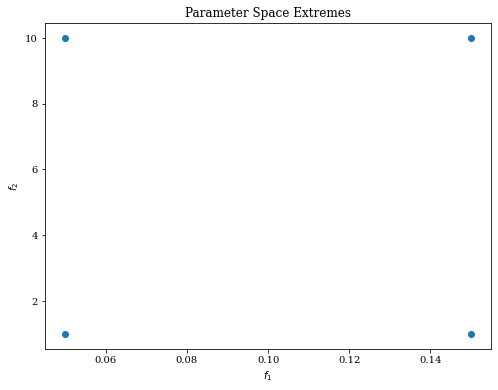

In [23]:
plot = Scatter(title='Parameter Space Extremes')
plot.add(np.array(lim_perms))
plot.show()

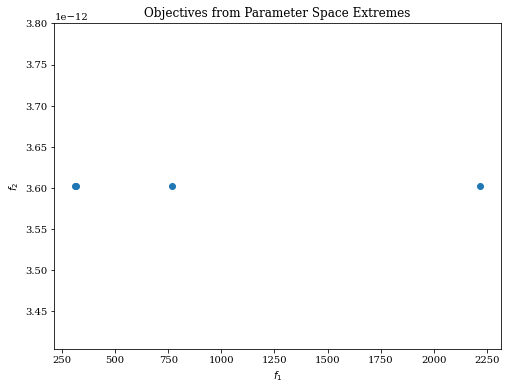

In [24]:
plot = Scatter(title='Objectives from Parameter Space Extremes')
plot.add(extObj)
plot.show()

#### Generation 1 Extremes

In [25]:
x_ext = np.zeros((n_var, n_var, 2))
imin = 0
imax = 1

for var in range(n_var):
    ind_min = np.argmin(X.transpose()[var])
    ind_max = np.argmax(X.transpose()[var])
    
    x_ext[var, :, imin] = X[ind_min]
    x_ext[var, :, imax] = X[ind_max]
    
    print(f'Parameter {var + 1}: {var_labels[var]}')
    print(f'     Min - Individual {ind_min}: {x_ext[var, :, imin]}')
    print(f'     Max - Individual {ind_max}: {x_ext[var, :, imax]}') 

Parameter 1: Threshold
     Min - Individual 8: [0.05093415 1.        ]
     Max - Individual 47: [0.14950315 3.        ]
Parameter 2: Propagation Steps
     Min - Individual 2: [0.09078287 1.        ]
     Max - Individual 23: [ 0.13263366 10.        ]


In [29]:
for var in range(n_var):
    ind_min = np.argmin(X.transpose()[var])
    ind_max = np.argmax(X.transpose()[var])
    
    indDir_min = os.path.join(genDir, f'ind{ind_min + 1}')
    indDir_max = os.path.join(genDir, f'ind{ind_max + 1}')
    ##### ACCESS INDIVIDUAL DIRECTORIES OF EXTREMES #####
    from IPython.display import Image
    print(f'Parameter {var + 1}: {var_labels[var]}')
    print(f'     Min - Individual {ind_min}: {x_ext[var, :, imin]}')
    print(f'          Objectives: {F[ind_min]}')
#     plt_min = os.path.join(indDir_min, 'plt.png')
#     display(Image(filename=plt_min))
    print(f'Parameter {var + 1}: {var_labels[var]}')
    print(f'     Max - Individual {ind_max}: {x_ext[var, :, imax]}')
    print(f'          Objectives: {F[ind_max]}')
#     plt_max = os.path.join(indDir_max, 'plt.png')
#     display(Image(filename=plt_max))

Parameter 1: Threshold
     Min - Individual 8: [0.05093415 1.        ]
          Objectives: [2.01000000e+03 3.60257633e-12]
Parameter 1: Threshold
     Max - Individual 47: [0.14950315 3.        ]
          Objectives: [2.24000000e+03 3.60257633e-12]
Parameter 2: Propagation Steps
     Min - Individual 2: [0.09078287 1.        ]
          Objectives: [2.00000000e+03 3.60257633e-12]
Parameter 2: Propagation Steps
     Max - Individual 23: [ 0.13263366 10.        ]
          Objectives: [2.02000000e+03 3.60257633e-12]


In [ ]:
# x_space = Scatter()
x_space = plotX(leg=True)
x_space.add(x_ext[:,:,imin], color='green', marker='s', s=50, label='min')
x_space.add(x_ext[:,:,imax], color='red', marker='s', s=50, label='max')
x_space.show()
    # Add extreme points to entire design space graph
#     x_space.ax.scatter()
#     x_space.remove(X[i_min])
#     x_space.add(x_ext[var, :, imin], color='red', label=f'Var.{var} min', zorder=1, s =30, marker='s')
#     x_space.add(x_ext[var, :, imax], color='red', label=f'Var.{var} max', zorder=1, s=30, marker='s')

In [ ]:
for var_i in range(n_var):
    for var_j in range(n_var):
        if var_i != var_j:
            print()
            print()
            plot = Scatter(title=f'{var_labels[var_i]} vs. {var_labels[var_j]}', 
                           labels = [var_labels[var_i], var_labels[var_j]],
                           legend=True)
            xy = np.column_stack((X.transpose()[var_i], X.transpose()[var_j]))
            plot.add(xy)

            x_iext = x_ext[var_i, var_i, :]
            y_iext = x_ext[var_i, var_j, :]
            xy = np.column_stack((x_iext,y_iext))
            plot.add(xy, label=f'Var.{var_i} extremes', color='red', marker='s', s=40)
            
            x_jext = x_ext[var_j, var_i, :]
            y_jext = x_ext[var_j, var_j, :]
            xy = np.column_stack((x_jext,y_jext))
            plot.add(xy, label=f'Var.{var_j} extremes', color='green', marker='s', s=40)
            
#             plot.add(xy, label='max', color='green', marker='s', s=40)
#             xy = np.array(x_ext[var_j, var_i, imax], x_ext[var_j, var_j, imax])
#             plot.add(xy, label='max', color='red', marker='s', s=40)
            plot.save(os.path.join(mapDir, f'{var_labels[var_i].replace(" ", "_")}-vs-{var_labels[var_j].replace(" ", "_")}.png'))
            plot.show()
        else:
            pass


#             x_jmax = x_ext[var_j, var_i, imax]
#             y_jmax = x_ext[var_j, var_j, imax]
#             x_imax = x_ext[var_i, var_i, imax]
#             y_imax = x_ext[var_i, var_j, imax]


# for x_i, x in enumerate(X.transpose()):
#         for f_i, f in enumerate(F.transpose()):
#             plot = Scatter(title=f'{var_labels[x_i]} vs. {obj_labels[f_i]}',
#                             labels=[var_labels[x_i], obj_labels[f_i]]
#                             )
#             xy = np.column_stack((x,f))
#             plot.add(xy)
            
            
# #             plot.save(os.path.join(mapDir, f'{var_labels[x_i].replace(" ", "_")}-vs-{obj_labels[f_i].replace(" ", "_")}.png'))
#             plot.show()

## Plots Directory

### Print Entities in Plots Directory

In [ ]:
ents = os.listdir(plotDir)
for ent in ents:
    print(ent)

### Print All PNGs

In [ ]:
for imageName in glob.glob(f'{plotDir}/*.png'): #assuming JPG
    display(Image(filename=imageName))
    print(imageName)

## Generation Directory

### Print Entities in Generation's Individuals Directories

In [ ]:
ind_max = 1

In [ ]:
for ind in range(1, ind_max + 1):
    indDir = os.path.join(genDir, f'ind{ind}')
    ind_x = X[ind]
    print(f'Individual {ind} - ', end='')
    for var in range(len(X[0])):
          print(f'{var_labels[var]}: {X[ind][var]}, ', end='')
    print()
#     for obj in range(len(F[0])):
#         print(f'{obj_labels[obj]}: {F[ind][obj]}, ', end='')
#     print()
    print()
    print(f'Entities in individual {ind} directory [{indDir}]: ')
    ents = os.listdir(indDir)
    for ent in ents:
        print(f'     {ent}')
        
    ##### Process/Display Data Individual Directories ######
        